# Data Analysis - First Exploration and Features

## Cargando dataset y preparación inicial

Para este análisis siempre partimos del dataset con los datos del PERIODO CORONAVIRUS, pero luego compararemos con el normal también.

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe final de extracción, donde están todas las canciones
data_ana_corona = pd.read_csv("data_global_coronaperiod.csv", sep = ',', parse_dates=['release_date_year'])
print('Tamaño inicial: ',data_ana_corona.shape)

# Quitamos algunas columnas que no usaremos y sobran
data_ana_corona = data_ana_corona.drop(columns=['Unnamed: 0', 'Position'])
print('Tamaño quitando columnas que sobran: ', data_ana_corona.shape)

# Quitamos los duplicados por canciones, no nos sirven de momento para los análisis
data_ana_corona = data_ana_corona.drop_duplicates(subset='spotify_id').copy()
print('Tamaño sin duplicados de canciones: ', data_ana_corona.shape)

# Para analizar teniendo en cuenta los streams totales y que esté ponderado, calculamos los pesos de cada canción respecto a los streams totales
# Importante hacerlo una vez quitados los duplicados
# Versión optimizada corta y sin warnings

data_ana_corona_2020 = data_ana_corona.loc[data_ana_corona['year'] == 2020]
data_ana_corona_2019 = data_ana_corona.loc[data_ana_corona['year'] == 2019]
data_ana_corona_2018 = data_ana_corona.loc[data_ana_corona['year'] == 2018]
data_ana_corona_2017 = data_ana_corona.loc[data_ana_corona['year'] == 2017]

data_ana_corona.loc[data_ana_corona.year == 2020,
                    'streamstotal_weights'] = data_ana_corona_2020['Streamstotal']/data_ana_corona_2020['Streamstotal'].sum()
data_ana_corona.loc[data_ana_corona.year == 2019,
                    'streamstotal_weights'] = data_ana_corona_2019['Streamstotal']/data_ana_corona_2019['Streamstotal'].sum()
data_ana_corona.loc[data_ana_corona.year == 2018,
                    'streamstotal_weights'] = data_ana_corona_2018['Streamstotal']/data_ana_corona_2018['Streamstotal'].sum()
data_ana_corona.loc[data_ana_corona.year == 2017, 
                    'streamstotal_weights'] = data_ana_corona_2017['Streamstotal']/data_ana_corona_2017['Streamstotal'].sum()

# COMPROBACIONES: Deberían sumar 1 los pesos de cada año
print('Peso 2020: ', data_ana_corona.loc[data_ana_corona['year'] == 2020, 'streamstotal_weights'].sum())
print('Peso 2019: ', data_ana_corona.loc[data_ana_corona['year'] == 2019, 'streamstotal_weights'].sum())
print('Peso 2018: ', data_ana_corona.loc[data_ana_corona['year'] == 2018, 'streamstotal_weights'].sum())
print('Peso 2017: ', data_ana_corona.loc[data_ana_corona['year'] == 2017, 'streamstotal_weights'].sum())

#Ver cómo sale
data_ana_corona[data_ana_corona['Track Name'] == 'Punto G']

Tamaño inicial:  (48066, 38)
Tamaño quitando columnas que sobran:  (48066, 36)
Tamaño sin duplicados de canciones:  (1581, 36)
Peso 2020:  1.0
Peso 2019:  0.9999999999999999
Peso 2018:  1.0
Peso 2017:  1.0


/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
204,Punto G,KAROL G,51826,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.275291,0.622449,0.00796,0.787,0.751,0.000139,0.0857,0.863559,0.091633,0.926,0.691617,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.002070
232,Punto G,KAROL G,122406,2019-05-03,2E82gORVSA7UMEz5M1IP3b,2019,1151711,OCEAN,2019-05-03,0.279327,0.622449,0.00938,0.791,0.746,0.000117,0.1250,0.864281,0.097713,0.905,0.691837,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.001235


# First exploration

En el siguiente gráfico vemos que en el aumento de streamstotales eS progresivo en años, esto puede significar que se escucha más Spotify, o que según pasan los años se escuchan más número de veces las canciones del top200, en vez de otras, es decir hay menos variedad en el Top200. Como la idea es que en nuestros análisis se usen datos ponderados respecto al año, debería afectar este tema.

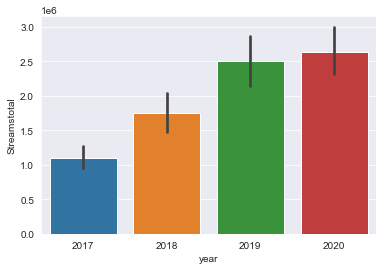

In [52]:
data_ana_corona.groupby(['year']).sum()
sns.barplot(x="year", y="Streamstotal", data=data_ana_corona)

Si hacemos un conteo del número de canciones únicas por año. De primeras es curioso que el 2019 tenga menos canciones únicas en el top200, ¿se ha escuchcado más de lo mismo?

In [53]:
data_ana_corona.groupby(['year']).count()

,Track Name,Artist,Streams,date,spotify_id,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,380,352,285,226,181,92,38,21,7,1,380,384,384,384,384
2018,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,399,369,313,210,122,48,20,9,5,1,399,401,401,401,401
2019,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,328,263,166,106,51,30,11,1,0,372,372,372,372,372
2020,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,419,354,279,105,70,23,7,3,0,0,419,424,424,424,424


Ojo! puede ocurrir que una misma canción de un artista se repita, porque está en el top200 dos años diferentes y albunes diferentes (por ejemplo, si se ha hecho un recopilatorio otro año). He decidido ignorarlo porque va a afectar poco en los análisis

In [54]:
data_ana_corona[data_ana_corona['Artist'] == 'KAROL G']

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
0,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982,Tusa,2019-11-07,0.324972,0.918367,0.29500,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.017033
61,Follow,KAROL G,152745,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,6900319,Follow,2020-04-01,0.330442,0.775510,0.66700,0.735,0.787,0.000006,0.0721,0.875476,0.198031,0.455,0.711901,4,2020-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.006159
102,Créeme,KAROL G,75552,2019-03-13,1mT47pKLXUwPYGwB91GcNz,2019,3272814,Créeme,2018-11-02,0.354546,0.734694,0.15400,0.715,0.872,0.000146,0.1100,0.904169,0.045599,0.682,0.230459,4,2018-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.003510
153,Culpables,KAROL G,56202,2019-03-13,6q8Lb50EtqNeeJXXe8mMAH,2019,2136436,Culpables,2018-09-14,0.390787,0.693878,0.27900,0.728,0.801,0.000005,0.1430,0.922521,0.065287,0.416,0.451744,4,2018-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.002291
204,Punto G,KAROL G,51826,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.275291,0.622449,0.00796,0.787,0.751,0.000139,0.0857,0.863559,0.091633,0.926,0.691617,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.002070
232,Punto G,KAROL G,122406,2019-05-03,2E82gORVSA7UMEz5M1IP3b,2019,1151711,OCEAN,2019-05-03,0.279327,0.622449,0.00938,0.791,0.746,0.000117,0.1250,0.864281,0.097713,0.905,0.691837,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.001235
242,Créeme,KAROL G,64151,2019-05-03,4EKZsrsCKyqr64FBHLc0DU,2019,600475,OCEAN,2019-05-03,0.359162,0.673469,0.12600,0.715,0.874,0.000162,0.1050,0.901707,0.045744,0.652,0.230833,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.000644
252,Love With A Quality,KAROL G,46140,2019-05-03,6F9DPkjP6Tbz9FLgLyYgX6,2019,46140,OCEAN,2019-05-03,0.383438,0.622449,0.06460,0.849,0.752,0.000003,0.1060,0.895798,0.177765,0.586,0.257712,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.000049
253,Culpables,KAROL G,41255,2019-05-03,4RGKft6YTTWHjpQeRIInuS,2019,362564,OCEAN,2019-05-03,0.396773,0.612245,0.28700,0.728,0.812,0.000003,0.1300,0.920059,0.087001,0.418,0.451544,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.000389
263,Ocean,KAROL G,31994,2019-05-03,6qoIFQfdmaQF9A1gb67tR7,2019,541126,OCEAN,2019-05-03,0.209542,0.744898,0.93300,0.727,0.482,0.000000,0.3880,0.815791,0.132889,0.487,0.083410,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11806556,0.89899,0.000580


# Pregunta 0: ¿Ha cambiado la cantidad de música que se escucha en spotify?

Se puede confirmar que sí, pero cuidado, porque puede ocurrir que Spotify era usado por menos gente o que la gente escuchaba más variedad (hay que acordarse que los datos son del top200 y toda la música escuchada no está en el top200).

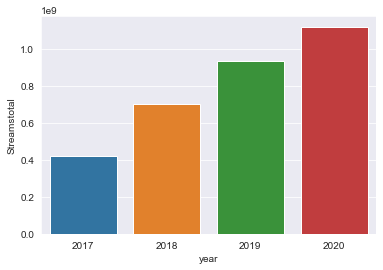

In [55]:
data_ana_streams = data_ana_corona.loc[:, ['year', 'Streamstotal']]
data_year_streams = data_ana_streams.groupby(['year']).sum()
data_year_streams.reset_index(inplace=True)


sns.barplot(x="year", y="Streamstotal", data=data_year_streams)

# Pregunta 1: ¿Han cambiado las features entre diferentes años?

Llamamos Features a las características de cada canción y que nos dan información de ella. En la web de Spotify explica qué significa cada feature y cual es su distribución en todas sus canciones (https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). En el análissi final por features, se explican.

Lo primero es ver una aproximación de las medias sin ponderar de las features, a ver si tienen sentido. Parece que sí, y todas están entre 0 y 1 como hicimos anteriormente.

Ploteamos algunas medias de una feature concreta (sin ponderar) para ver qué se ve, y podemos ver algunas tendencias, eso sí, ligeras

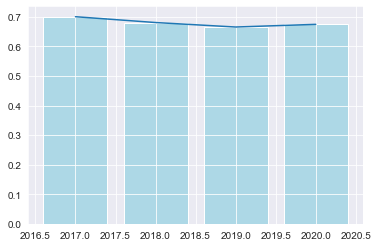

Text(0.5, 1.0, 'Acousticness')

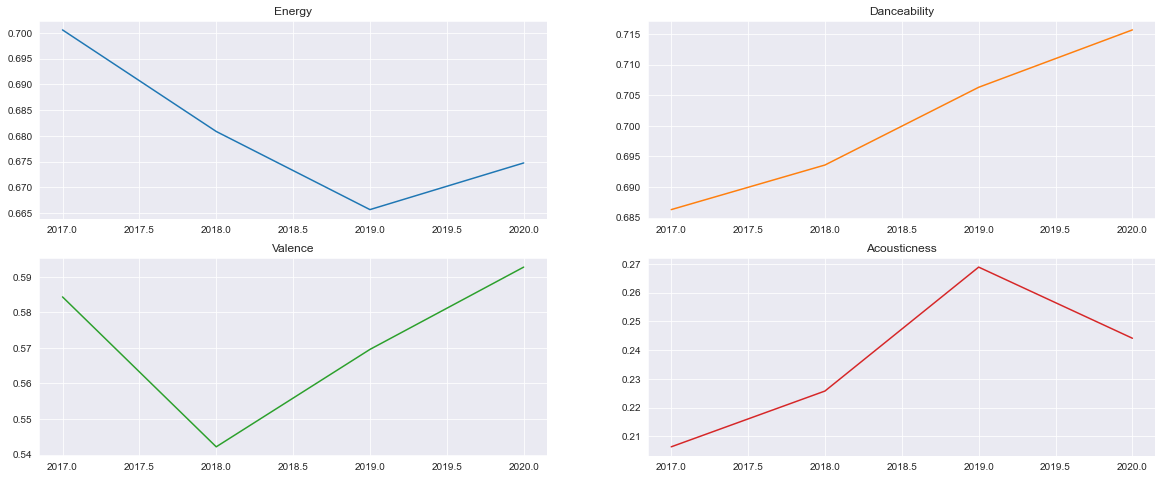

In [56]:
data_features_means_nopon = data_ana_corona.groupby(['year']).mean()
data_features_means_nopon.reset_index(inplace=True)

x_years = data_features_means_nopon["year"]

fig, ax = plt.subplots()
ax.bar(x_years,data_features_means_nopon["energy"], color="lightblue", zorder=0)
# sns.regplot(x=x, y=y, ax=ax)
ax.plot(x_years, data_features_means_nopon["energy"])
ax.set_ylim(0, None)
plt.show()

'''fig, axs = plt.subplots(3)
fig.suptitle('Comparative')
axs[0].plot(data_year_means["year"], data_year_means["energy"])
axs[1].plot(data_year_means["year"], data_year_means["danceability"])
axs[2].plot(data_year_means["year"], data_year_means["valence"])'''

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 8)
axs[0, 0].plot(x_years, data_features_means_nopon["energy"])
axs[0, 0].set_title('Energy')
axs[0, 1].plot(x_years, data_features_means_nopon["danceability"], 'tab:orange')
axs[0, 1].set_title('Danceability')
axs[1, 0].plot(x_years, data_features_means_nopon["valence"], 'tab:green')
axs[1, 0].set_title('Valence')
axs[1, 1].plot(x_years, data_features_means_nopon["acousticness"], 'tab:red')
axs[1, 1].set_title('Acousticness')

Antes de analizar nada vamos a ponderar los datos a ver si hay diferencia. Para ello hemos hecho una función para calcular las medias ponderadas de cada feature por años, para poner en gráficos fácilmente después.

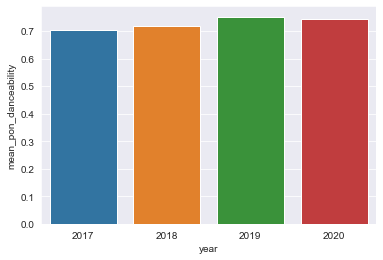

In [57]:
 def mediapon_features (feature):
    data_dance_compar = data_ana_corona.loc[:, ['year', feature, 'streamstotal_weights']]
    data_dance_compar["mean_pon_" + feature] = data_dance_compar[feature] * data_dance_compar['streamstotal_weights']
    media_dance_compar = data_dance_compar.groupby(['year']).sum()
    media_dance_compar.reset_index(inplace=True)
    media_dance_compar = media_dance_compar.drop(columns=[feature])
    return media_dance_compar

# Prueba con danceability
media_dance_pon = mediapon_features ('danceability')
sns.barplot(x="year", y="mean_pon_danceability", data=media_dance_pon)

Hacemos la comparación a ver si hay diferencias. Hay una diferencia sutil, pero que en algunos casos puede variar la tendencia claramente, por lo que haremos la ponderación de todas las features.

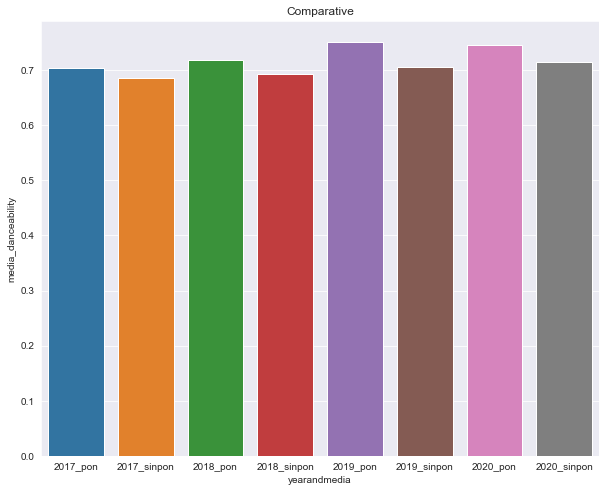

In [58]:
# Comparar medias sin y con ponderación
comparar_pon_ysinpon = pd.merge(data_features_means_nopon, media_dance_pon, how='right', on="year")
comparar_pon_ysinpon = comparar_pon_ysinpon[['year', 'danceability', 'mean_pon_danceability']]

#Hago un melt de la tabla porque quiero comparar
comparar_pon_ysinpon2 = pd.melt(comparar_pon_ysinpon,
        id_vars = ['year'],
       value_vars = ['danceability', "mean_pon_danceability"],
       value_name = 'media_danceability')

list_x = ['2017_sinpon', '2018_sinpon', '2019_sinpon', '2020_sinpon', '2017_pon', '2018_pon', '2019_pon', '2020_pon']
comparar_pon_ysinpon2['yearandmedia'] = list_x
comparar_pon_ysinpon2 =  comparar_pon_ysinpon2.drop(columns=['variable', 'year'])
comparar_pon_ysinpon2 = comparar_pon_ysinpon2.sort_values('yearandmedia')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparative')
sns.barplot(x="yearandmedia", y ='media_danceability', data=comparar_pon_ysinpon2)


Ahora vamos a plotear todas las features para ver su tendencia con la ponderación hecha, pero vamos a aprovechar esta visualización y añadimos los datos para comparar el PERIODO PANDEMIA y eL PERIODO NORMAL. Para ello hacemos lo mismo que hemos hecho en las celdas anteriores pero con el PERIODO NORMAL

In [59]:
# EXTRAER DATOS DE PERIODO NORMAL

# Cargamos el dataframe final de extracción, donde están todas las canciones
data_ana_normal = pd.read_csv("data_global_normalperiod.csv", sep = ',', parse_dates=['release_date_year'])
print('Tamaño inicial: ',data_ana_normal.shape)

# Quitamos algunas columnas que no usaremos y sobran
data_ana_normal = data_ana_normal.drop(columns=['Unnamed: 0', 'Position'])
print('Tamaño quitando columnas que sobran: ', data_ana_normal.shape)

# Quitamos los duplicados por canciones, no nos sirven de momento para los análisis
data_ana_normal = data_ana_normal.drop_duplicates(subset='spotify_id').copy()
print('Tamaño sin duplicados de canciones: ', data_ana_normal.shape)

# Para analizar teniendo en cuenta los streams totales y que esté ponderado, calculamos los pesos de cada canción respecto a los streams totales
# Importante hacerlo una vez quitados los duplicados
# Versión optimizada corta y sin warnings

data_ana_normal_2020 = data_ana_normal.loc[data_ana_normal['year'] == 2020]
data_ana_normal_2019 = data_ana_normal.loc[data_ana_normal['year'] == 2019]
data_ana_normal_2018 = data_ana_normal.loc[data_ana_normal['year'] == 2018]
data_ana_normal_2017 = data_ana_normal.loc[data_ana_normal['year'] == 2017]

data_ana_normal.loc[data_ana_normal.year == 2020, 'streamstotal_weights'] = data_ana_normal_2020['Streamstotal']/data_ana_normal_2020['Streamstotal'].sum()
data_ana_normal.loc[data_ana_normal.year == 2019, 'streamstotal_weights'] = data_ana_normal_2019['Streamstotal']/data_ana_normal_2019['Streamstotal'].sum()
data_ana_normal.loc[data_ana_normal.year == 2018, 'streamstotal_weights'] = data_ana_normal_2018['Streamstotal']/data_ana_normal_2018['Streamstotal'].sum()
data_ana_normal.loc[data_ana_normal.year == 2017, 'streamstotal_weights'] = data_ana_normal_2017['Streamstotal']/data_ana_normal_2017['Streamstotal'].sum()

# COMPROBACIONES: Deberían sumar 1 los pesos de cada año
print('Peso 2020: ', data_ana_normal.loc[data_ana_normal['year'] == 2020, 'streamstotal_weights'].sum())
print('Peso 2019: ', data_ana_normal.loc[data_ana_normal['year'] == 2019, 'streamstotal_weights'].sum())
print('Peso 2018: ', data_ana_normal.loc[data_ana_normal['year'] == 2018, 'streamstotal_weights'].sum())
print('Peso 2017: ', data_ana_normal.loc[data_ana_normal['year'] == 2017, 'streamstotal_weights'].sum())

#Ver cómo sale
data_ana_normal[data_ana_normal['Track Name'] == 'Punto G']


# Exportamos un archivo CSV el resultado para tenerlo ya listo en otros análisis
data_ana_normal.to_csv("data_ana_normalperiod.csv", sep = ',')

#Revisamos los tipos de datos:
data_ana_normal.head(2)

Tamaño inicial:  (48059, 39)
Tamaño quitando columnas que sobran:  (48059, 37)
Tamaño sin duplicados de canciones:  (1559, 37)
Peso 2020:  1.0
Peso 2019:  1.0
Peso 2018:  1.0
Peso 2017:  1.0


/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,Period,streamstotal_weights
0,Tusa,KAROL G,432554,2020-01-08,7k4t7uLgtOxPwTpFmtJNTY,2020,33218824,Tusa,2019-11-07,0.370381,0.957895,0.295,0.803,0.715,0.000134,0.0574,0.910438,0.520652,0.574,0.294453,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,NormalPeriod,0.028869
62,Ocean,KAROL G,29680,2020-01-19,6qoIFQfdmaQF9A1gb67tR7,2020,90300,OCEAN,2019-05-03,0.262716,0.778947,0.933,0.727,0.482,0.000000,0.3880,0.814908,0.173930,0.487,0.128252,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,NormalPeriod,0.000078


Rehago la función para poder sacar también el periodo NORMAL y preparamos datos de cada periodo

In [60]:
# Rehago la función
def mediapon_features (feature, dataframe_period):
    media_compar = dataframe_period.loc[:, ['year', feature, 'streamstotal_weights']]
    media_compar["mean_pon_" + feature] = media_compar[feature] * media_compar['streamstotal_weights']
    media_compar = media_compar.groupby(['year']).sum()
    media_compar.reset_index(inplace=True)
    media_compar = media_compar.drop(columns=[feature])
    return media_compar


In [61]:
features = ['length',
            'popularity',
            'acousticness',
            'danceability',
            'energy',
            'instrumentalness',
            'liveness',
            'loudness',
            'speechiness',
            'valence',
            'tempo']

# Creo un diccionario para meter todos los dataframes con los datos ponderados
dic_features_means_corona = {}
for x in features:
    dic_features_means_corona[x] = mediapon_features (x, data_ana_corona)
    
dic_features_means_normal = {}
for x in features:
    dic_features_means_normal[x] = mediapon_features (x, data_ana_normal)
    
    
media_length_corona = dic_features_means_corona['length']['mean_pon_length']
media_popularity_corona = dic_features_means_corona['popularity']['mean_pon_popularity']
media_acousticness_corona = dic_features_means_corona['acousticness']['mean_pon_acousticness']
media_danceability_corona = dic_features_means_corona['danceability']['mean_pon_danceability']
media_energy_corona = dic_features_means_corona['energy']['mean_pon_energy']
media_instrumentalness_corona = dic_features_means_corona['instrumentalness']['mean_pon_instrumentalness']
media_liveness_corona = dic_features_means_corona['liveness']['mean_pon_liveness']
media_loudness_corona = dic_features_means_corona['loudness']['mean_pon_loudness']
media_speechiness_corona = dic_features_means_corona['speechiness']['mean_pon_speechiness']
media_valence_corona = dic_features_means_corona['valence']['mean_pon_valence']
media_tempo_corona = dic_features_means_corona['tempo']['mean_pon_tempo']

media_length_normal = dic_features_means_normal ['length']['mean_pon_length']
media_popularity_normal  = dic_features_means_normal ['popularity']['mean_pon_popularity']
media_acousticness_normal  = dic_features_means_normal ['acousticness']['mean_pon_acousticness']
media_danceability_normal  = dic_features_means_normal ['danceability']['mean_pon_danceability']
media_energy_normal  = dic_features_means_normal ['energy']['mean_pon_energy']
media_instrumentalness_normal  = dic_features_means_normal ['instrumentalness']['mean_pon_instrumentalness']
media_liveness_normal  = dic_features_means_normal ['liveness']['mean_pon_liveness']
media_loudness_normal  = dic_features_means_normal ['loudness']['mean_pon_loudness']
media_speechiness_normal  = dic_features_means_normal ['speechiness']['mean_pon_speechiness']
media_valence_normal  = dic_features_means_normal ['valence']['mean_pon_valence']
media_tempo_normal  = dic_features_means_normal ['tempo']['mean_pon_tempo']

Ploteamos todos los gráficos para ver la tendencia en PERIODO PANDEMIA y en PERIODO NORMAL

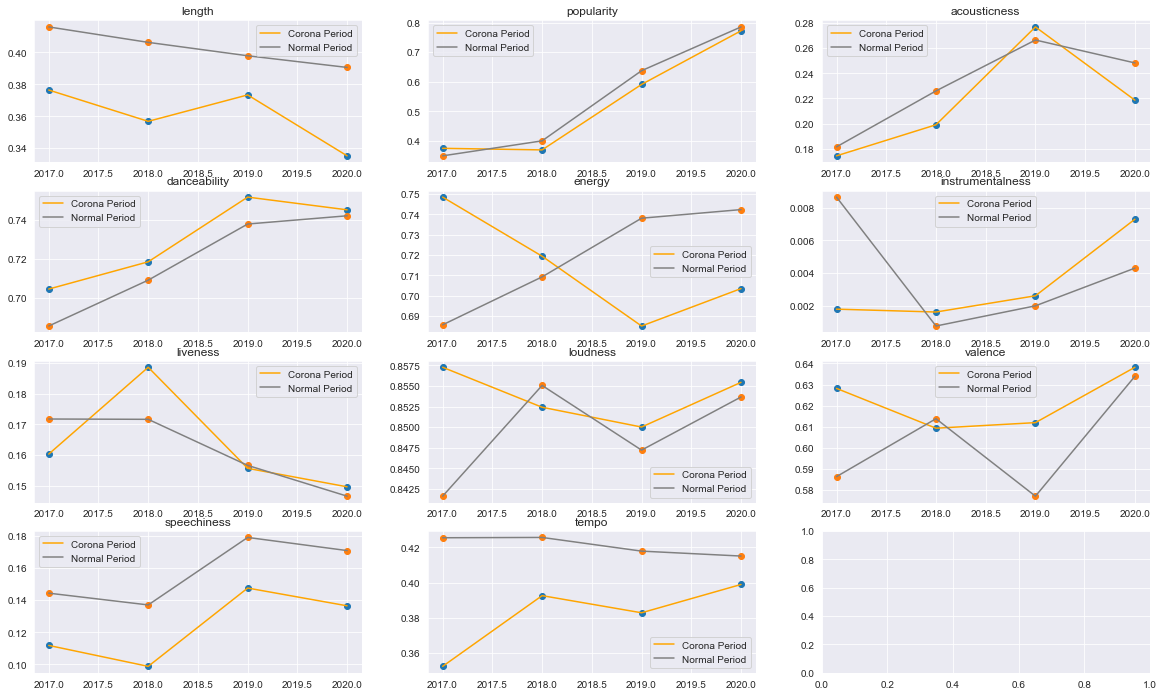

In [62]:
x_years = dic_features_means_corona['length']['year']

fig, axs = plt.subplots(4, 3)
fig.set_size_inches(20, 12)

graph_1 = axs[0, 0]
graph_1.plot(x_years, media_length_corona,label='Corona Period', color = 'orange') # PERIODO CORONA
graph_1.plot(x_years, media_length_normal,label='Normal Period', color = 'grey') # PERIODO NORMAL
graph_1.scatter(x_years, media_length_corona)
graph_1.scatter(x_years, media_length_normal)
graph_1.set_title('length')
graph_1.legend()

graph_2 = axs[0, 1]
graph_2.plot(x_years, media_popularity_corona,label='Corona Period', color = 'orange')
graph_2.plot(x_years, media_popularity_normal,label='Normal Period', color = 'grey')
graph_2.scatter(x_years, media_popularity_corona)
graph_2.scatter(x_years, media_popularity_normal)
graph_2.set_title('popularity')
graph_2.legend()

graph_3 = axs[0, 2]
graph_3.plot(x_years, media_acousticness_corona,label='Corona Period', color = 'orange')
graph_3.plot(x_years, media_acousticness_normal,label='Normal Period', color = 'grey')
graph_3.scatter(x_years, media_acousticness_corona)
graph_3.scatter(x_years, media_acousticness_normal)
graph_3.set_title('acousticness')
graph_3.legend()

graph_4 = axs[1, 0]
graph_4.plot(x_years, media_danceability_corona,label='Corona Period', color = 'orange')
graph_4.plot(x_years, media_danceability_normal,label='Normal Period', color = 'grey')
graph_4.scatter(x_years, media_danceability_corona)
graph_4.scatter(x_years, media_danceability_normal)
graph_4.set_title('danceability')
graph_4.legend()

graph_5 = axs[1, 1]
graph_5.plot(x_years, media_energy_corona,label='Corona Period', color = 'orange')
graph_5.plot(x_years, media_danceability_normal,label='Normal Period', color = 'grey')
graph_5.scatter(x_years, media_energy_corona)
graph_5.scatter(x_years, media_danceability_normal)
graph_5.set_title('energy')
graph_5.legend()

graph_6 = axs[1, 2]
graph_6.plot(x_years, media_instrumentalness_corona,label='Corona Period', color = 'orange')
graph_6.plot(x_years, media_instrumentalness_normal,label='Normal Period', color = 'grey')
graph_6.scatter(x_years, media_instrumentalness_corona)
graph_6.scatter(x_years, media_instrumentalness_normal)
graph_6.set_title('instrumentalness')
graph_6.legend()

graph_7 = axs[2, 0]
graph_7.plot(x_years, media_liveness_corona,label='Corona Period', color = 'orange')
graph_7.plot(x_years, media_liveness_normal,label='Normal Period', color = 'grey')
graph_7.scatter(x_years, media_liveness_corona)
graph_7.scatter(x_years, media_liveness_normal)
graph_7.set_title('liveness')
graph_7.legend()

graph_8 = axs[2, 1]
graph_8.plot(x_years, media_loudness_corona,label='Corona Period', color = 'orange')
graph_8.plot(x_years, media_loudness_normal,label='Normal Period', color = 'grey')
graph_8.scatter(x_years, media_loudness_corona)
graph_8.scatter(x_years, media_loudness_normal)
graph_8.set_title('loudness')
graph_8.legend()

graph_9 = axs[2, 2]
graph_9.plot(x_years, media_valence_corona,label='Corona Period', color = 'orange')
graph_9.plot(x_years, media_valence_normal,label='Normal Period', color = 'grey')
graph_9.scatter(x_years, media_valence_corona)
graph_9.scatter(x_years, media_valence_normal)
graph_9.set_title('valence')
graph_9.legend()


graph_10 = axs[3, 0]
graph_10.plot(x_years, media_speechiness_corona,label='Corona Period', color = 'orange')
graph_10.plot(x_years, media_speechiness_normal,label='Normal Period', color = 'grey')
graph_10.scatter(x_years, media_speechiness_corona)
graph_10.scatter(x_years, media_speechiness_normal)
graph_10.set_title('speechiness')
graph_10.legend()

graph_11 = axs[3, 1]
graph_11.plot(x_years, media_tempo_corona,label='Corona Period', color = 'orange')
graph_11.plot(x_years, media_tempo_normal,label='Normal Period', color = 'grey')
graph_11.scatter(x_years, media_tempo_corona)
graph_11.scatter(x_years, media_tempo_normal)
graph_11.set_title('tempo')
graph_11.legend()


# Análisis feature por feature

Creamos función usando plot

In [63]:
def plot_features_analysis(feature):
    media_feature_corona = mediapon_features(feature, data_ana_corona)
    fig, axs = plt.subplots(ncols=2)
    fig.set_figheight(6)
    fig.set_figwidth(17)
    fig.suptitle("Periodo Coronavirus", fontsize=25)
    sns.barplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_corona, ax=axs[0])
    sns.regplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_corona, ax=axs[1])

    media_feature_normal = mediapon_features (feature, data_ana_normal)
    fig, axs = plt.subplots(ncols=2)
    fig.set_figheight(6)
    fig.set_figwidth(17)
    fig.suptitle("Periodo Normal", fontsize=25)
    sns.barplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_normal, ax=axs[0])
    sns.regplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_normal, ax=axs[1])
    
    print('Diferencia Media en periodo Pandemia y periodo Normal: '
      ,media_feature_corona["mean_pon_{}".format(feature)][3]-media_feature_normal["mean_pon_{}".format(feature)][3])
    
    return

Creamos función usando Altair

In [64]:
def plot_features_analysis_altair(feature):
    
    # Corona
    media_feature_corona = mediapon_features(feature, data_ana_corona)
    media_feature_corona['year'] = media_feature_corona['year'].astype(str)
    
    graph_corona = alt.Chart(media_feature_corona.reset_index(),
                                         title="Evolución de la Media de <{}> por años. Azul: Pandemia, Rojo: Normal".format(feature)).mark_bar(color = 'blue', opacity=0.7, size=50
                                                                   ).encode(
        x = "year",
        y = "mean_pon_{}".format(feature),
    ).properties(width=700, height=400)
    
    # Normal
    media_feature_normal = mediapon_features(feature, data_ana_normal)
    graph_normal = alt.Chart(media_feature_normal).mark_bar(color = 'red', opacity=0.5, size=90
                                                                   ).encode(
        x = "year",
        y = "mean_pon_{}".format(feature),
    ).properties(width=700, height=400)
    
    return graph_corona+graph_normal

### >>> acousticness

- **Feature**: ¿Cuánto de acústica es una canción? Del 0 al 1, siendo 1 que la canción es totalmente acústica
- **Tendencia**: Hay una tendencia desde el 2017 a escuchar canciones más acústicas en ambos periodos, pero justo en el 2020 hay un bajón.
- **Antes y después de pandemia**: No podemos decir que haya un camio de tendencia porque en ambos periodos este bajón de la media es similar pero si se ve que es más brusco.¿Puede ser que durante el coronavirus hayamos dejado de lado las canciones que suenan más acústicas?

Diferencia Media en periodo Pandemia y periodo Normal:  -0.029626441262025238


alt.LayerChart(...)

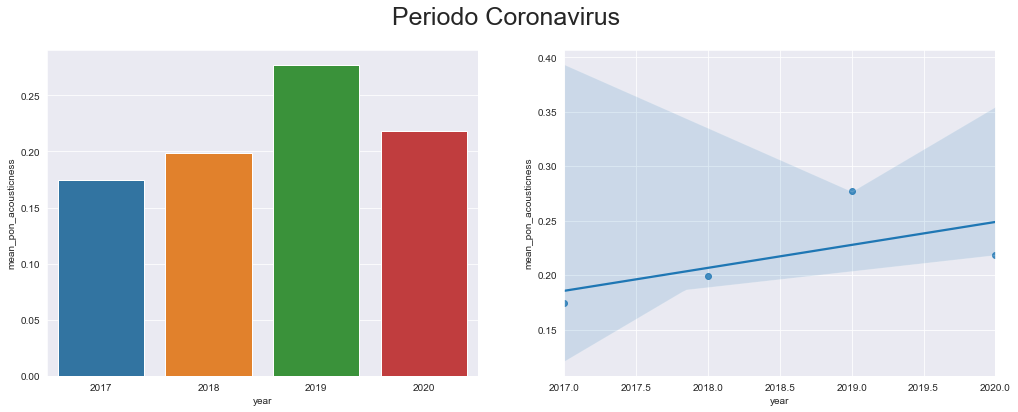

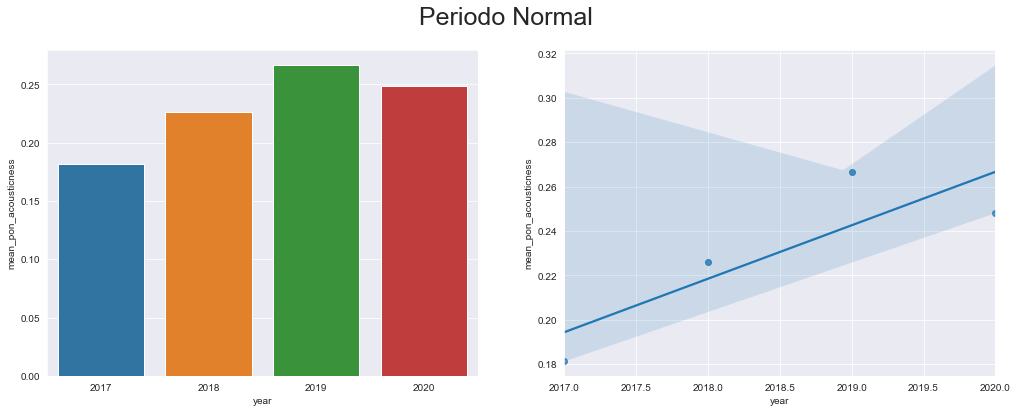

In [65]:
plot_features_analysis('acousticness')
plot_features_analysis_altair('acousticness')

### >>> danceability

- **Feature**: ¿Cuánto de bailable es la canción? Es un cálculo que ha hecho Spotify teniendo en cuenta: tempo, rhythm stability, beat strength, and overall regularity. Valores cercanos a 0 es menos bailable y cercanos a 1 muy bailables.
- **Tendencia**: Hay aumento progresivo, casi a la par en ambos periodos que cada vez se esccuhan más canciones bailables.
- **Antes y después**: Durante la pandemia se han escuchado más música menos bailable respecto al año anterior (no es una diferencia grande), pero eso no ocurre en el Periodo Normal. Podemos estar hablando de uan diferencia concreta. ¿Esa pequeña diferencia podría decir que durante la pandemia se han escuchado menos música bailable? Tendría sentido con el encerramiento en casa o no?

Diferencia Media en periodo Pandemia y periodo Normal:  0.0030609746204862676


alt.LayerChart(...)

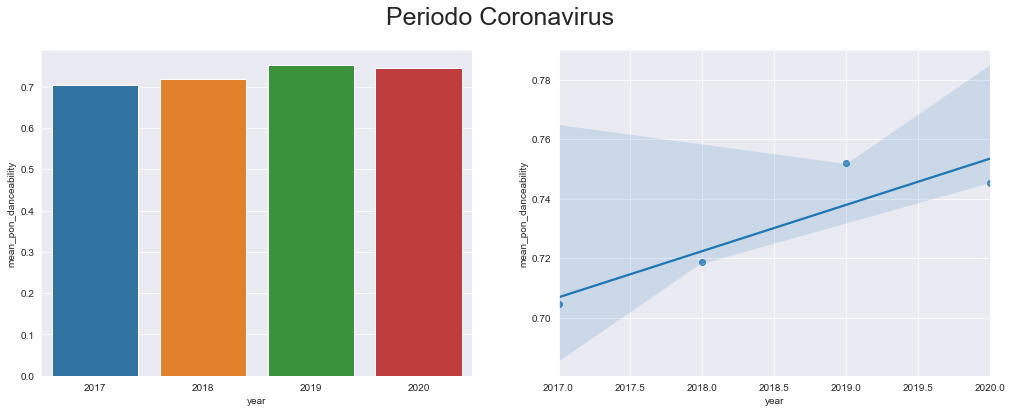

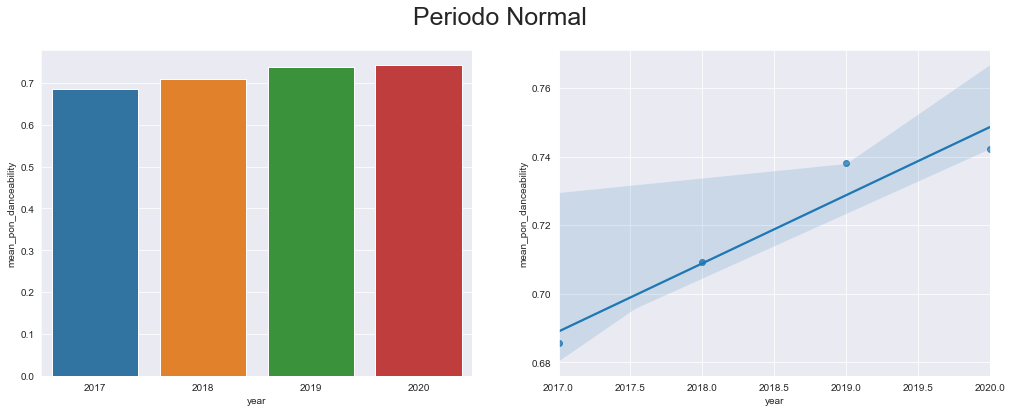

In [16]:
plot_features_analysis('danceability')
plot_features_analysis_altair('danceability')

### >>> energy

- **Feature**: Nos dice cuánto de enérgica es una canción. Generalmente canciones energéticas están relacionadas con la velocidad, sonoridad y ruido. Ejemplo: Death metal tendrá un valor alto mientras que una canción de Bach tendrá un valor bajo.
- **Tendencia**: La tendencia es una disminución en la media a lo largo de los años, salvo en el último año, 2020 que en ambos periodos aumenta, se ha cambiado la tendencia.
- **Antes y después**: Aunque hay un aumento de la música enérgica en el 2020, pero no se puede decir que sea por el coronavirus porque ocurre igual en el periodo normal.

Diferencia Media en periodo Pandemia y periodo Normal:  0.0052907105906966345


alt.LayerChart(...)

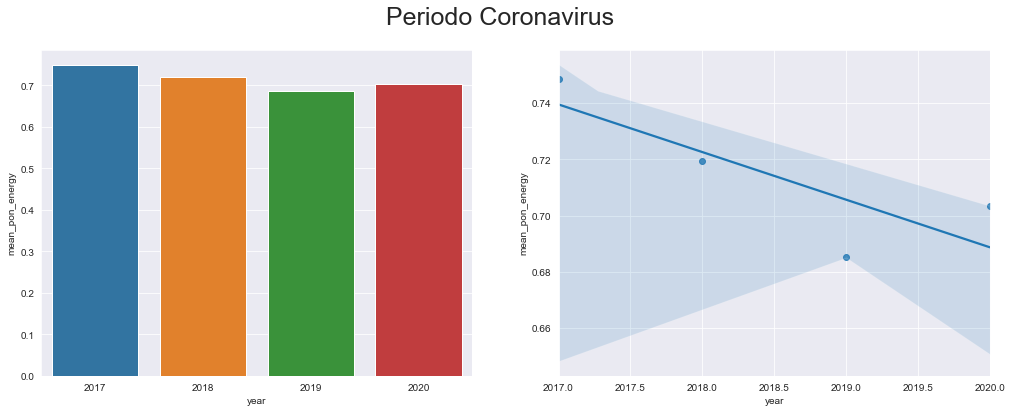

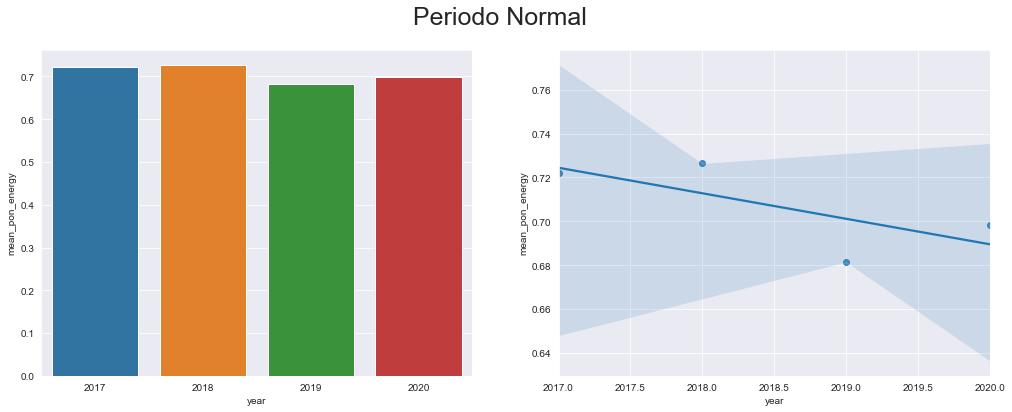

In [17]:
plot_features_analysis('energy')
plot_features_analysis_altair('energy')

### >>> instrumentalness

- **Feature**: Nos dice si una canción tiene audio vocal o no. Por ejemplo una canción de rap es muy vocal y tendrá un valor muy cercano a 0, y al revés si es instrumental. Como casi todas las canciones que existen son vocales, hay muchas cerca del rango 0 (hemos quitado las canciones isntrumental del datasets porque son casi como outliers.
- **Tendencia**: No arriesgamos a sacar ninguna tendencia porque no tiene sentido considerando que es más una variables para saber si una canción es instrumental o no.
- **Antes y después**: Se podría decir que durante la pandemia se han escuchado más música que es un pelín más instrumental, pero es arriesgado.

Diferencia Media en periodo Pandemia y periodo Normal:  0.0029797060779090598


alt.LayerChart(...)

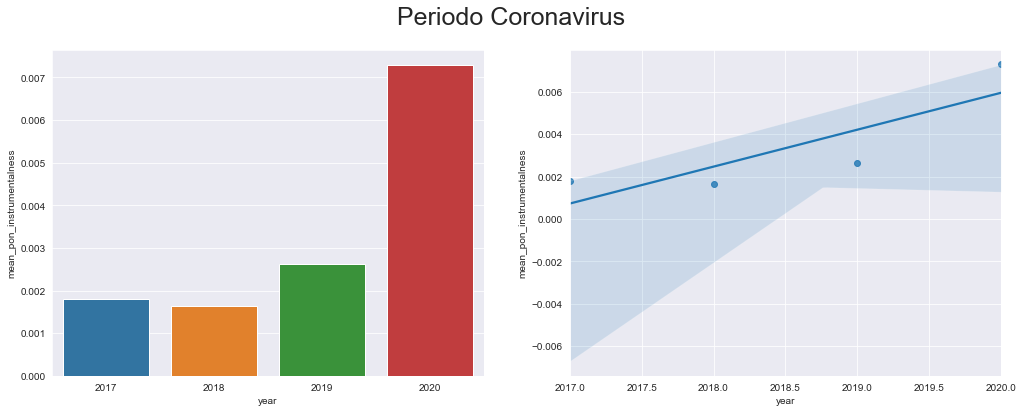

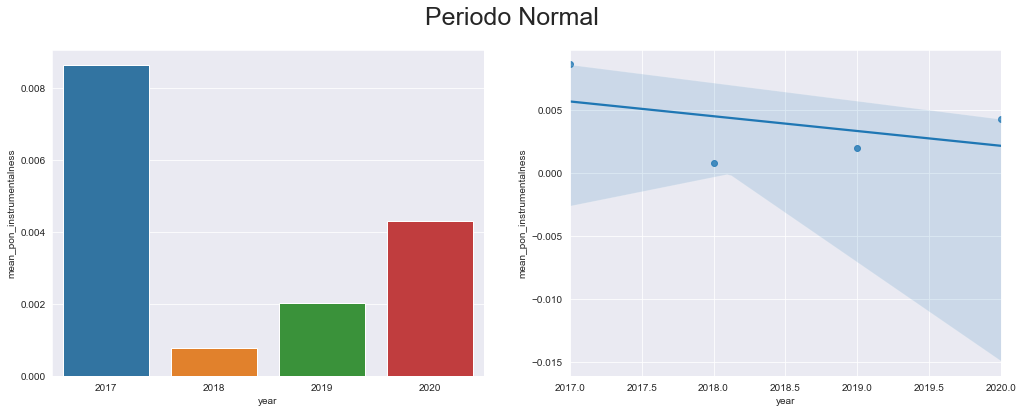

In [18]:
plot_features_analysis('instrumentalness')
plot_features_analysis_altair('instrumentalness')

### >>> valence

- **Feature**: Mide del 0 al 1 la positividad de la canción, siendo canciones muy positivas, felices, eufóricas las que están más cerca de 1 y canciones más tristes, negativas..., están más cerca de 0
- **Tendencia**: la tendencia es que se escucha más música happy, pero con pequeños saltos.
- **Antes y después**: Podríamos pensar que deberíamos notar una diferencia durante el periodo pandemia, pero la realidad es que es muy poca sin comparamos con el periodo normal. Aún así creo que aquí hay un dato relevante.

Diferencia Media en periodo Pandemia y periodo Normal:  0.004270127570754734


alt.LayerChart(...)

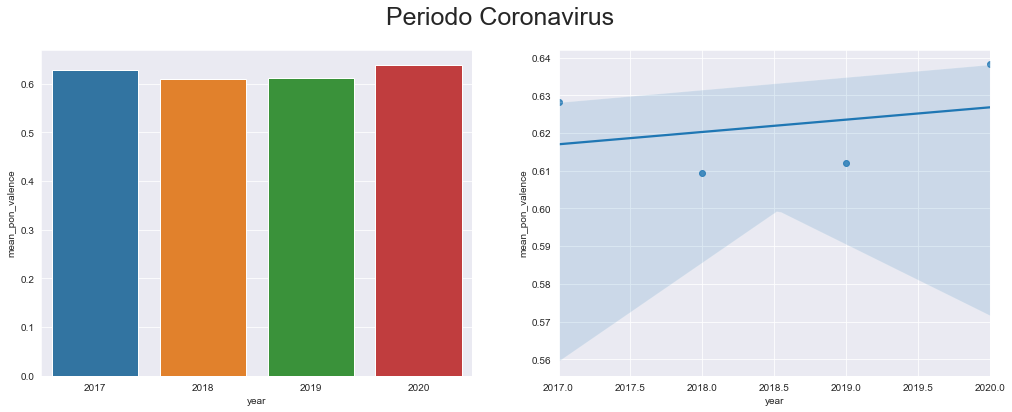

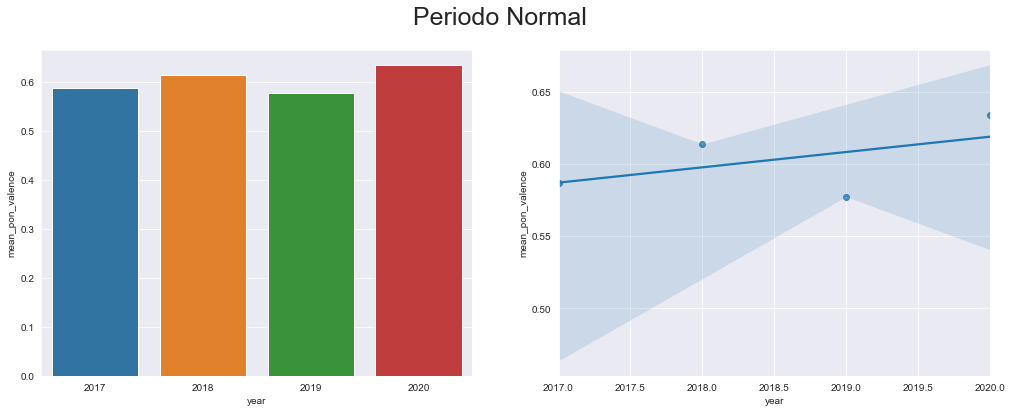

In [19]:
plot_features_analysis('valence')
plot_features_analysis_altair('valence')

### >>> liveness

- **Feature**: Detecta si hay presencia de audiencia en la canción Valores altos es que es más probable que sea una canción grabada en directo. Por encima de 0.8 e suan probabilidad alta de que sea en directo.
- **Tendencia**: Se escucha cada año menos música en directo, pero no son valores muy diferenciables.
- **Antes y después**: Se pdoría decir 

Diferencia Media en periodo Pandemia y periodo Normal:  0.003058397933407564


alt.LayerChart(...)

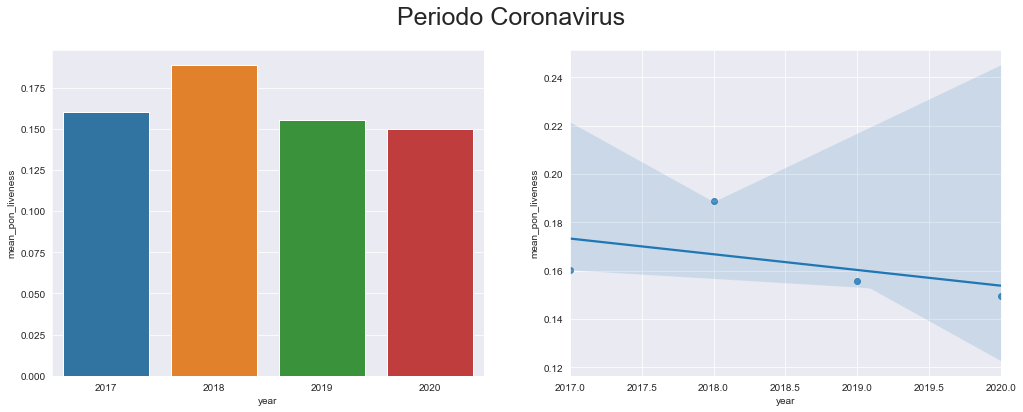

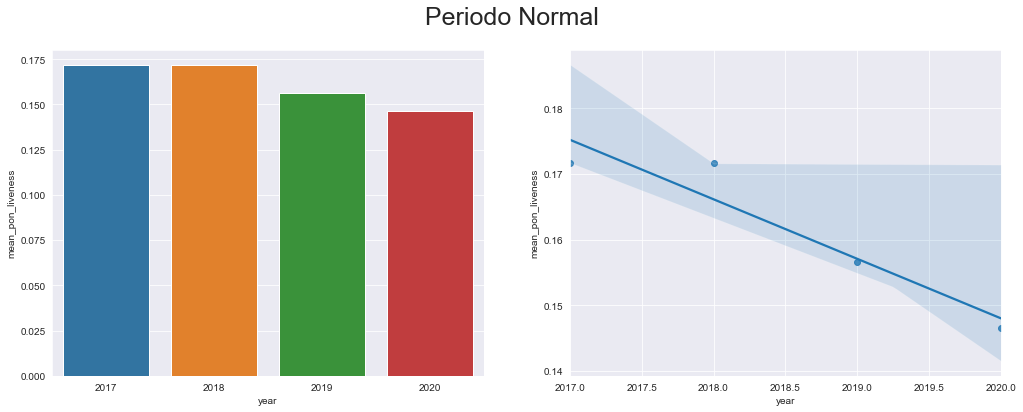

In [20]:
plot_features_analysis('liveness')
plot_features_analysis_altair('liveness')

### >>> loudness

- **Feature**: Cálculo del ruido en decibelios, siendo el cercano a 1 más ruidoso y cercano a 0 menos, teniendo en cuenta que mucha musica se encuentra entre el 0.5 y 1.
- **Tendencia**: no hay tendencia clara.
- **Antes y después**: Nada relevante


Diferencia Media en periodo Pandemia y periodo Normal:  0.0017814275283791758


alt.LayerChart(...)

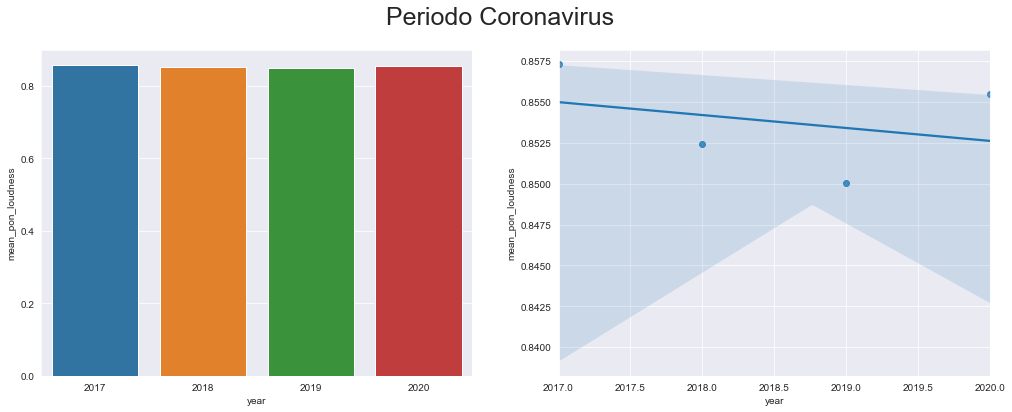

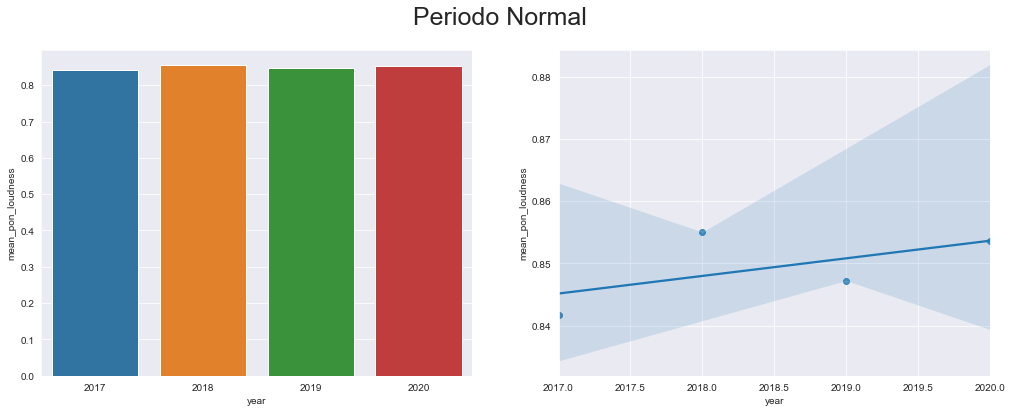

In [22]:
plot_features_analysis('loudness')
plot_features_analysis_altair('loudness')

In [ ]:
Las siguientes features no las hemos considerado relevantes 

### >>> speechiness

- **Feature**: Esta feature detecta la presencia de textos hablados, en vez de cantados (audiolibros, talkshows, etc.). Valores entre 0.33 y 0.66 pueden contener múscia y texto (ej. hihop. Valores por debajo de 0.33 es música sin texto hablado.
- **Tendencia**: La tendencia es la misma en ambos periodos pero se ve que en el 2020 hay una reducción, siendo en el periodo pandemia más marcada. Aún así esta feature no es relavante.
- **Antes y después**: Nada relevante

Diferencia Media en periodo Pandemia y periodo Normal:  -0.03436402915134473


alt.LayerChart(...)

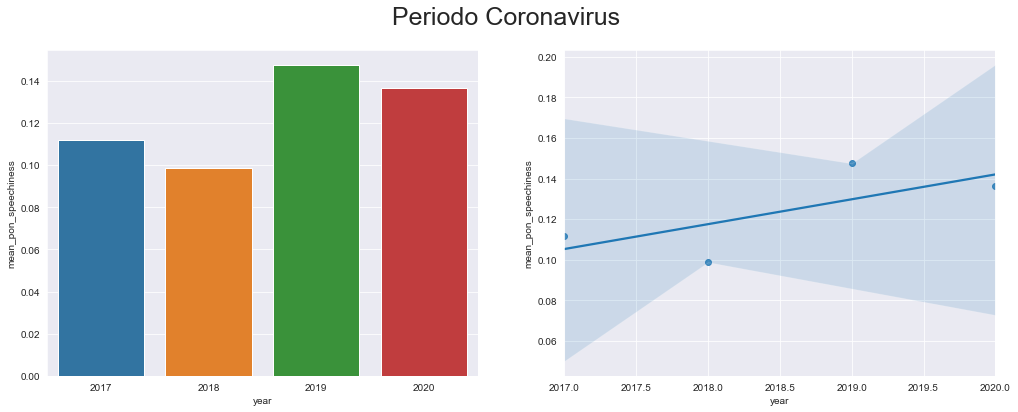

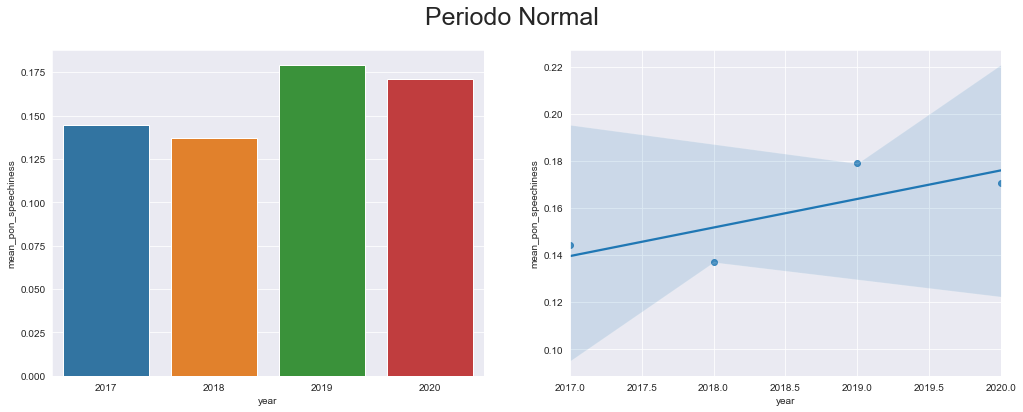

In [25]:
plot_features_analysis('speechiness')
plot_features_analysis_altair('speechiness')

### >>> tempo

- **Feature**: Mide el tempo en beats per minute, esta es una feature que hemos normalizado.
- **Tendencia**: La tendencia es que se va reduciendo por año en el periodo normal, pero no es así en el periodo pandemia, que hay un aumento
- **Antes y después**: ¿En el periodo pandemia escuchamos más música con menor tempo, más lenta?

Diferencia Media en periodo Pandemia y periodo Normal:  -0.016136843760713837


alt.LayerChart(...)

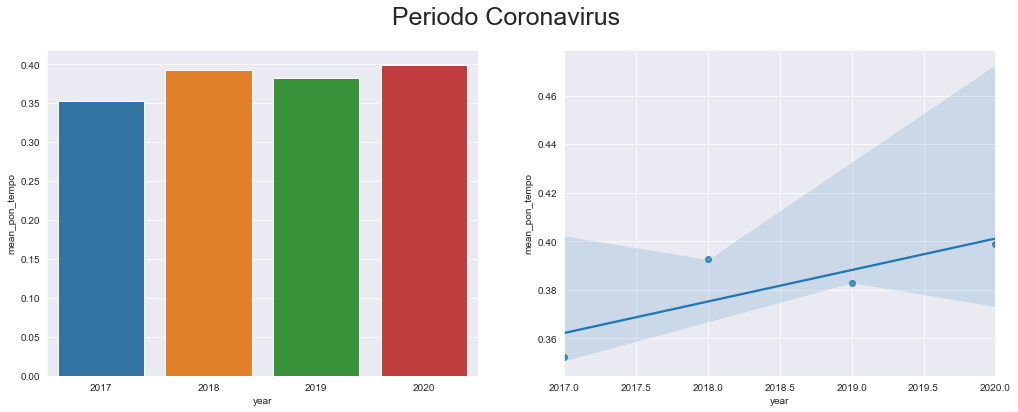

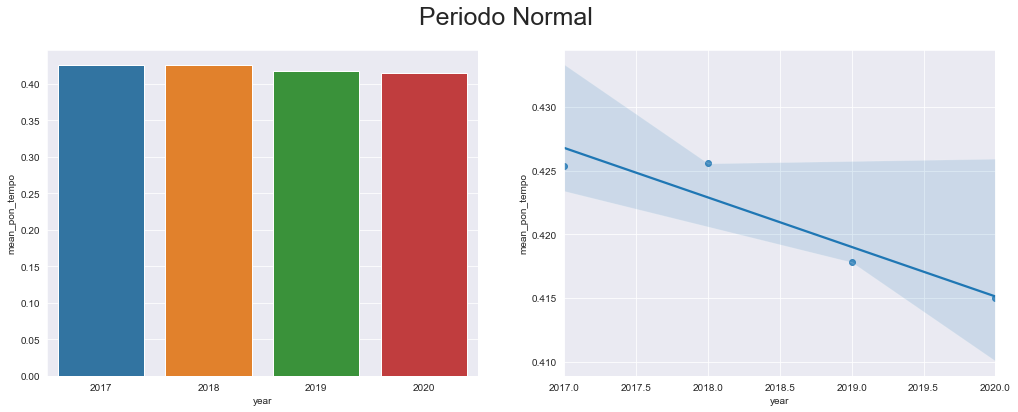

In [27]:
plot_features_analysis('tempo')
plot_features_analysis_altair('tempo')

### >>> Length

- **Feature**: Longitud de las canciones, a mayor valor, más larga.
- **Tendencia**: Se ve que que la tendencia es que la longitud de las canciones más escuchadas sean cada vez más cortas, siendo más claro en el Periodo Normal
- **Antes y después del coronavirus**: Se ve que las canciones más escuchadas durante la pandemia son más cortas, respecto a años anteriores y repecto a otro periodo


Diferencia Media en periodo Pandemia y periodo Normal:  -0.055362713694575294


alt.LayerChart(...)

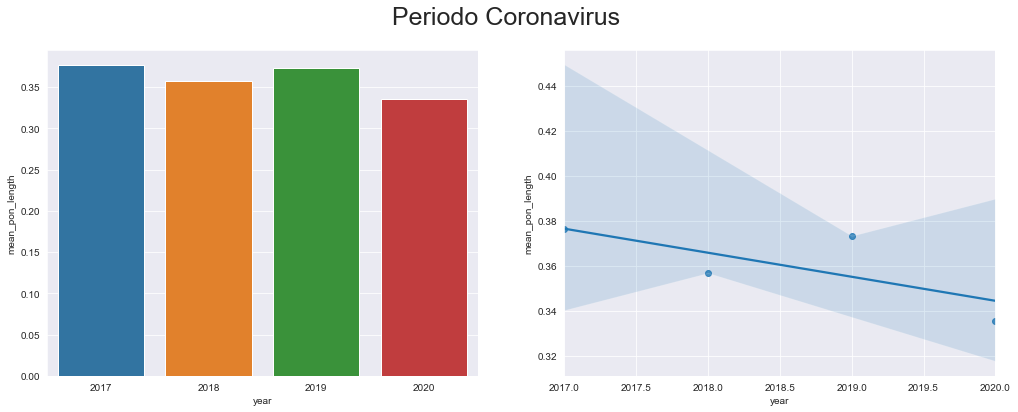

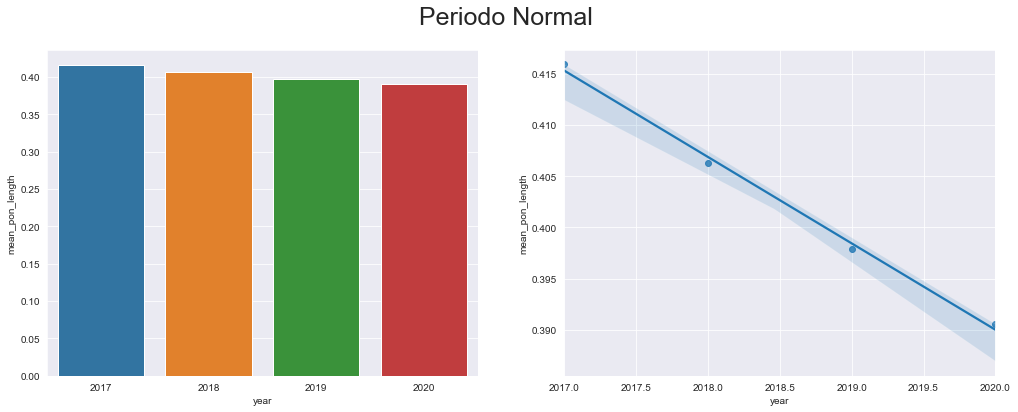

In [28]:
plot_features_analysis('length')
plot_features_analysis_altair('length')

### >>> Popularity

- **Feature**: Mide la popularidad de la canción, según unos cálculos propios de Spotify
- **Tendencia**: Se ve que que la tendencia es que se escuchen canciones que son más populares, pero es lógico si están dentro del top200, así que no nos aporta mucho
- **Antes y después del coronavirus**: Es muy parecido

Diferencia Media en periodo Pandemia y periodo Normal:  -0.013043045949368115


alt.LayerChart(...)

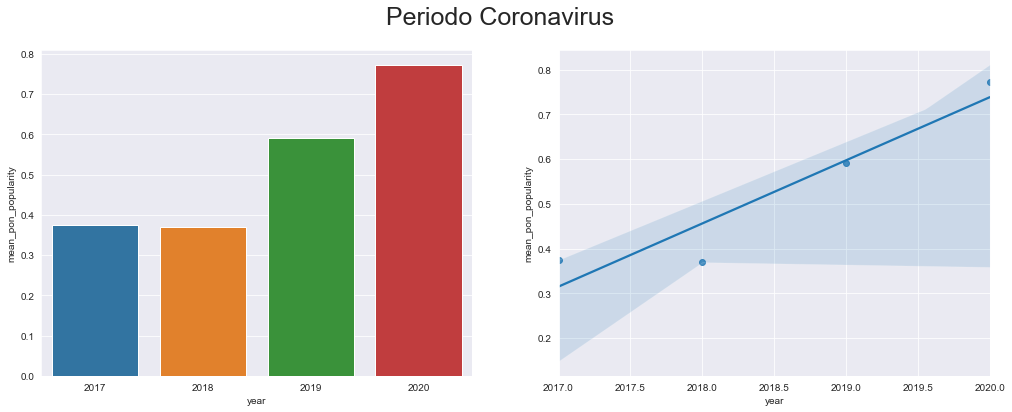

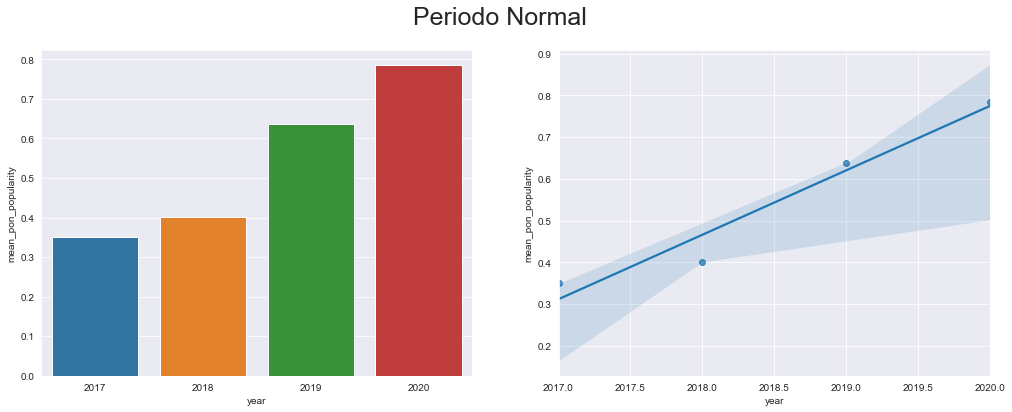

In [29]:
plot_features_analysis('popularity')
plot_features_analysis_altair('popularity')

## Conclusión:

Tema a muy tener en cuenta:

- No se pueden sacar datos claros de que haya habido un cambio en el tipo de música que escuchamos en el periodo de pandemia repecto a años anteriores. Aún así, en un último Notebook donde incluimos un análisis con las playlists, podemos sacar algunos datos comparativos que tal vez pueden dar más luz.
- Los lanzamientos de discos de mucho éxito pueden influir bastante en las medias de las features para un periodo tan concreto y falsear datos de tendencias. Por ejemplo, Bad Bunny que tiene una cantidad de Streams muy altas duarnte el periodo de Coronavirus, lanzó album el 29 de febrero de 2020, esto quiere decir que si se ha escuchado mucha música suya durante ese periodo, la media de las features, se acercará a las medias de las features de sus canciones. Como próximo análisis se podría comparar las medias de las canciones de dicho artistas con las del periodo completo

